**Ejercicio N° 5**  Recuperatorio Primer Parcial 2015

Las siguientes relaciones

$$\hat{x}=\frac{x(x+y)}{x+y+\epsilon}$$
$$\hat{y}=\frac{(x+y)(\epsilon x+y)}{x+y+\epsilon}$$
definen un grupo de Lie uniparamétrico. Usando SymPy demostrar que $(\hat{x},\hat{y})$ son simetrías de la ecuación   

$$y'=\frac{ x^2\sin(x + y) + y}{x(1-x\sin(x + y))}.$$

Encontrar variables canónicas asocidas a las simetrías.  Resolver la ecuación diferencial.


#### Primero veamos si el grupo propuesto es simetría de la ecuación.

In [2]:
from sympy import *
init_printing()
x,epsilon=symbols('x,epsilon')
y=Function('y')(x)
x1=x*(x+y)/(y+(1+epsilon)*x)
y1=(epsilon*x+y)*(x+y)/(y+(1+epsilon)*x)
exp1=y1.diff(x)/x1.diff(x)
exp2=exp1.subs(y.diff(x),(x**2*sin(x+y)+y)/x/(1-x*sin(x+y)))
x1,y1=symbols('x1,y1')
exp2=exp2.simplify()
exp3=exp2.subs({y:(-epsilon*x1+y1)*(x1+y1)/(y1+(1-epsilon)*x1),x:x1*(x1+y1)/(y1+(1-epsilon)*x1)})


#### En exp3 tenemos el resultado del cambio de varibles en la ecuación. Veamos que tiene

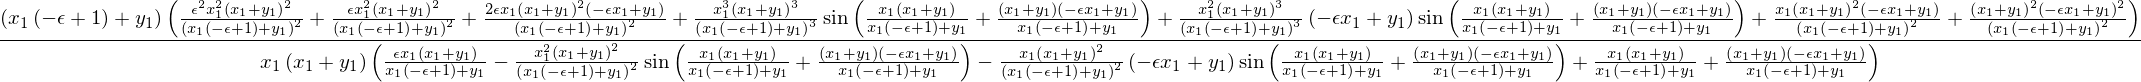

In [4]:
exp3

#### Verdaderamente asusta. Veamos si lo simplifica

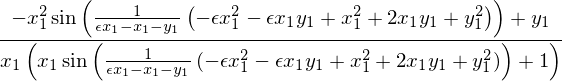

In [5]:
exp4=exp3.simplify()
exp4

#### La ecuación luce parecida a la original, pero lamentablemete no simplifica el argumento de la función sen. Tomo esos argumentos por separado y le pido que me los simplifique

In [6]:
((-epsilon*x1**2 - epsilon*x1*y1 + x1**2 + 2*x1*y1 + y1**2)/(epsilon*x1 - x1 - y1)).simplify()

#### Los argumentos de la función sen es -x1-y1 que es justo lo que necesito para que quede la ecuación original.   Ahora hallemos coordenadas canónicas

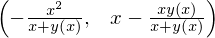

In [7]:
x1=x*(x+y)/(y+(1+epsilon)*x)
y1=(epsilon*x+y)*(x+y)/(y+(1+epsilon)*x)
xi=x1.diff(epsilon).subs(epsilon,0)
eta=y1.diff(epsilon).subs(epsilon,0)
xi,eta


In [8]:
(eta/xi).simplify()

In [9]:
dsolve(y.diff(x)-eta/xi,y)

#### Vemos que r=y+x

In [10]:
r=symbols('r')
s=Integral((1/xi).subs(y,r-x),x).doit()
s

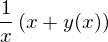

In [11]:
s=s.subs(r,x+y)
s

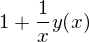

In [12]:
s.expand()


#### La variable s sería 1+y/x. Pero las variables canónicas no son únicas, vimos que (F(r),G(r)+s) es canónica, para cualquier F no nula y G.En particular si tomamos F(r)=r y G(r)=-1, vemos que podemos elegir como coordenadas canónicas r=x+y y s=y/x.  Hagamos la sustitución en coordenadas canónicas

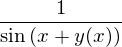

In [13]:
r=x+y
s=y/x
exp5=r.diff(x)/s.diff(x)
exp6=exp5.subs(y.diff(x),(x**2*sin(x+y)+y)/x/(1-x*sin(x+y)))
exp6.simplify()


#### Vemos que el resultado es 1/sen(r). No obstante hagamos, de curiosidad, la sustitución como si no nos hubiesemos dado cuenta todavía del resultado. Hallemos los cambios inversos (r,s)->(x,y)

In [14]:
r2,s2,x2,y2=symbols('r2,s2,x2,y2')
solve([r2-x2-y2,s2-y2/x2],[x2,y2])

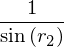

In [15]:
exp6.subs({y:r2*s2/(s2+1),x:r2/(s2+1)}).simplify()

#### La ecuación que resulta r'=1/sen(r) se resuelve facilmente a mano. Nos queda cos(r)=s+C  ->  cos(x+y)=y/x+C que es la solución de la ecuación original

**Ejercicio 2.2(c) p. 41 de Hydon**. Hay que hallar el grupo de Lie cuyo generador infintesimal es
$$X=2xy\partial_x+(y^2-x^2)\partial_y$$
La idea es

1) Hallar coordenadas canónicas

2) Usar que en canónicas el grupo de simetrías satisface 

$$\hat{r}=r\quad\text{y}\quad\hat{s}=s+\epsilon$$

3) Escribir las relaciones anteriores en las variables originales.

In [3]:
x,y,r,s=symbols('x,y,r,s')
f=Function('f')(x)
dsolve(f.diff(x)-(f**2-x**2)/2/x/f)

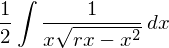

In [4]:
Integral(1/(2*x*sqrt(x*(r-x))),x).doit()

No lo sabe hacer. Si hacemos la sustitución $x=u^2$ nos queda
$$\int\frac{dx}{2x\sqrt{x(r-x)}}=\int\frac{du}{u^2\sqrt{r-u^2}}.$$
Y esta si la sabe resolver.

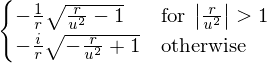

In [5]:
u=symbols('u')
Integral(1/u**2/sqrt(r-u**2),u).doit()

$s=-\frac{1}{r}\sqrt{\frac{r}{u^2}-1}=  -\frac{1}{r} \sqrt{  \frac{r-x}{x}}=  -\frac{x}{x^2+y^2} \sqrt{  \frac{y^2/x}{x}}=-\frac{y}{x^2+y^2}$

Ahora escribimos
$$\hat{r}=r\quad\text{y}\quad\hat{s}=s+\epsilon$$
en $x,y$.

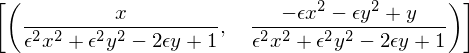

In [11]:
x,y,xn,yn,epsilon=symbols('x,y,\hat{x},\hat{y},epsilon')
A=solve([(xn**2+yn**2)/xn-(x**2+y**2)/x , -yn/(xn**2+yn**2)+y/(x**2+y**2)-epsilon],[xn,yn])
A

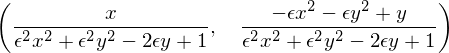

In [12]:
A[0]

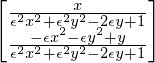

In [13]:
A=Matrix(A[0])
A

Chequeemos que $\left.\frac{d}{d\epsilon}(\hat{x},\hat{y})\right|_{\epsilon=0}=(2xy,y^2-x^2)$

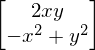

In [14]:
A.diff(epsilon).subs(epsilon,0)

Chequeemos la propiedad de grupo de Lie. Definimos el operador $T$ con lambda

In [15]:
T=lambda x,y,epsilon: Matrix([ x/(epsilon**2*(x**2+y**2)-2*epsilon*y+1),-(epsilon*x**2+epsilon*y**2-y)/(epsilon**2*(x**2+y**2)-2*epsilon*y+1)])

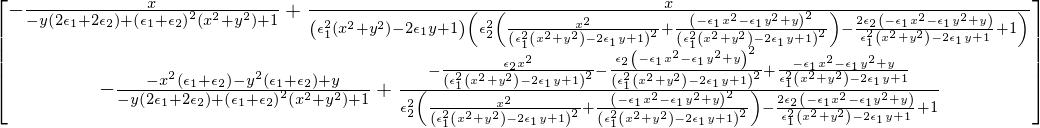

In [16]:
epsilon_1,epsilon_2=symbols('epsilon_1,epsilon_2')
expr=T(T(x,y,epsilon_1)[0],T(x,y,epsilon_1)[1],epsilon_2)-T(x,y,epsilon_1+epsilon_2)
expr

In [17]:
simplify(expr)